In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

C = 100 # mkF

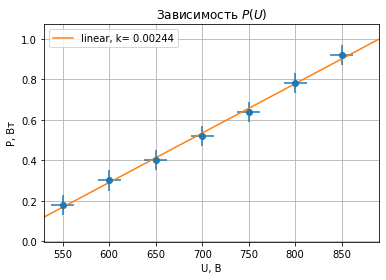

0.2675999999651379 0.007182336595565774
0.023448576338391935 0.00033786048637509444


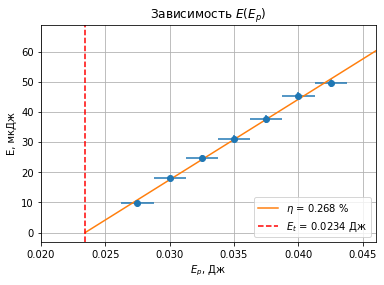

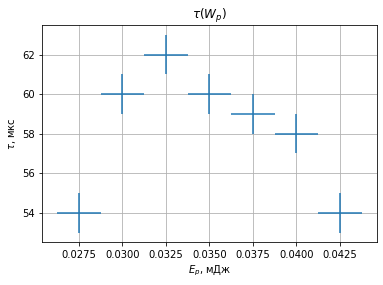

In [28]:
# data 1
U_cond = [850, 800, 750, 700, 650, 600, 550] # V
P_impulse = [0.92, 0.78, 0.64, 0.52, 0.40, 0.30, 0.18] # Watt
width_impulse = [54, 58, 59, 60, 62, 60, 54] # mks

E_p = (C * np.array(U_cond)^2)/2/1e6
E = np.array(P_impulse) * np.array(width_impulse)

delta_E = 0.01*np.array(width_impulse) + np.array(P_impulse) * 1

def linear(x, a, b):
    return a*(x - b)

plt.title('Зависимость $P(U)$')
plt.grid()
plt.xlabel('U, В')
plt.ylabel('P, Вт')
popt, pcov = curve_fit(linear, U_cond, P_impulse)
plt.errorbar(U_cond, P_impulse, xerr = 12.5, yerr = 0.05, linestyle='', marker ='o')

plt.xlim([530, 890])
x1 = 500
x2 = 900

plt.plot([x1, x2], [popt[0]*(x1-popt[1]), popt[0]*(x2-popt[1])], label='linear, k= {:.3}'.format(popt[0]))
plt.legend()
plt.savefig('./pics/linear1.png', dpi = 500)
plt.show()

plt.title('Зависимость $E(E_p)$')
plt.grid()
plt.xlabel('$E_p$, Дж')
plt.ylabel('E, мкДж')
popt, pcov = curve_fit(linear, E_p, E)
plt.errorbar(E_p, E, xerr = 2*E_p/np.array(U_cond)*12.5, yerr = delta_E, linestyle='', marker ='o')

print(popt[0]/1e4, np.sqrt(pcov[0, 0])/1e4)
print(popt[1], np.sqrt(pcov[1, 1]))

plt.xlim([0.02,0.046])
x1 =popt[1]
x2 = 0.048

plt.plot([x1, x2], [popt[0]*(x1-popt[1]), popt[0]*(x2-popt[1])],
         label=r'$\eta$ = {:.3} %'.format(popt[0]/1e4))
plt.axvline(popt[1], label='$E_t$ = {:.3} Дж'.format(popt[1]), color='r', linestyle='--')
plt.legend()
plt.savefig('./pics/linear_W1.png', dpi = 500)
plt.show()

plt.title(r'$ \tau(W_p)$')
plt.grid()
plt.xlabel('$E_p$, мДж')
plt.ylabel(r'$\tau$, мкс')
plt.errorbar(E_p, width_impulse, xerr = 2*E_p/np.array(U_cond)*12.5, yerr = 1, linestyle='')
plt.savefig('./pics/linear_width1.png', dpi = 500)
plt.show()

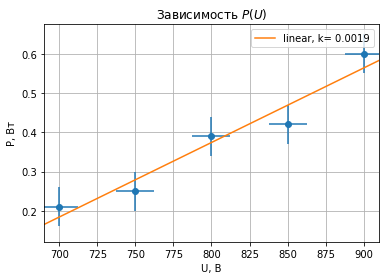

0.20116000057852756 0.0505760473873699
0.03117916665945363 0.002389497736772123


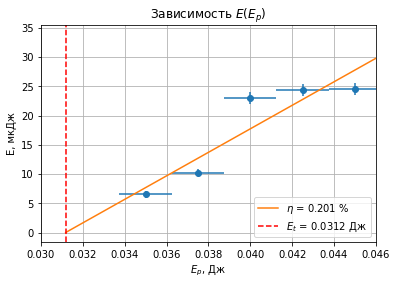

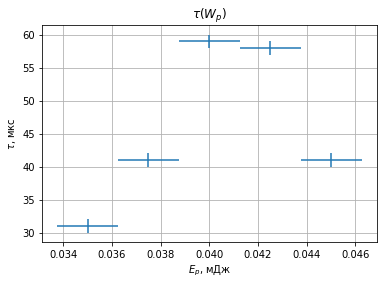

In [27]:
# data 2
U_cond = [900, 850, 800, 750, 700]
P_impulse = [0.60, 0.42, 0.39, 0.25, 0.21 ]
width_impulse = [41, 58, 59, 41, 31]

E_p = (C * np.array(U_cond)^2)/2/1e6
E = np.array(P_impulse) * np.array(width_impulse)

delta_E = 0.01*np.array(width_impulse) + np.array(P_impulse) * 1

def linear(x, a, b):
    return a*(x - b)

plt.title('Зависимость $P(U)$')
plt.grid()
plt.xlabel('U, В')
plt.ylabel('P, Вт')
popt, pcov = curve_fit(linear, U_cond, P_impulse)
plt.errorbar(U_cond, P_impulse, xerr = 12.5, yerr = 0.05, linestyle='', marker ='o')

plt.xlim([690, 910])
x1 = 680
x2 = 920

plt.plot([x1, x2], [popt[0]*(x1-popt[1]), popt[0]*(x2-popt[1])], label='linear, k= {:.3}'.format(popt[0]))
plt.legend()
plt.savefig('./pics/linear2.png', dpi = 500)
plt.show()

plt.title('Зависимость $E(E_p)$')
plt.grid()
plt.xlabel('$E_p$, Дж')
plt.ylabel('E, мкДж')
popt, pcov = curve_fit(linear, E_p, E)
plt.errorbar(E_p, E, xerr = 2*E_p/np.array(U_cond)*12.5, yerr = delta_E, linestyle='', marker ='o')

print(popt[0]/1e4, np.sqrt(pcov[0, 0])/1e4)
print(popt[1], np.sqrt(pcov[1, 1]))

plt.xlim([0.030,0.046])
x1 =popt[1]
x2 = 0.048

plt.plot([x1, x2], [popt[0]*(x1-popt[1]), popt[0]*(x2-popt[1])],
         label=r'$\eta$ = {:.3} %'.format(popt[0]/1e4))
plt.axvline(popt[1], label='$E_t$ = {:.3} Дж'.format(popt[1]), color='r', linestyle='--')
plt.legend()
plt.savefig('./pics/linear_W2.png', dpi = 500)
plt.show()

plt.title(r'$ \tau(W_p)$')
plt.grid()
plt.xlabel('$E_p$, мДж')
plt.ylabel(r'$\tau$, мкс')
plt.errorbar(E_p, width_impulse, xerr = 2*E_p/np.array(U_cond)*12.5, yerr = 1, linestyle='')
plt.savefig('./pics/linear_width2.png', dpi = 500)
plt.show()